<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/pmdarmia_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
!pip install microprediction

### pmdarima hello world
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [16]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:20]

In [17]:
import pmdarima as pm 
def pmdarima_next(ys):
   modl = pm.auto_arima(ys, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')
   preds, conf_int = modl.predict(n_periods=1, return_conf_int=True)
   return preds[0]

def run(ys):
  """ Slow, see river package or others if you don't like """
  burnin = 10
  y_hats = list()
  for t in range(len(ys)):
     if t>burnin:
        y_hat = pmdarima_next(ys[:t])
     elif t>=1:
        y_hat = ys[t-1]
     else:
        y_hat = 0 
     y_hats.append(y_hat)
  return y_hats 

In [11]:
XS = run(YS)

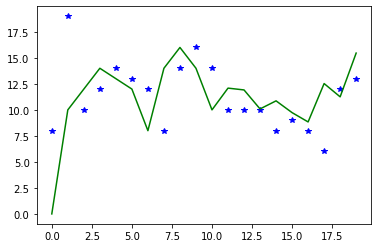

In [18]:
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(XS[:25],'g')